In [1]:
import pandas as pd
df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/air-passengers.csv', parse_dates=['ds'])
df.head()

,unique_id,ds,y
0,AirPassengers,1949-01-01,112
1,AirPassengers,1949-02-01,118
2,AirPassengers,1949-03-01,132
3,AirPassengers,1949-04-01,129
4,AirPassengers,1949-05-01,121


In [2]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

sf = StatsForecast(
    models=[AutoARIMA(season_length = 12)],
    freq='ME',
)

sf.fit(df)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


StatsForecast(models=[AutoARIMA])

In [3]:
forecast_df = sf.predict(h=12, level=[90])
forecast_df.head()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
unique_id,,,,
AirPassengers,1960-12-31,444.309570,424.981995,463.637146
AirPassengers,1961-01-31,418.213745,394.727051,441.700409
AirPassengers,1961-02-28,446.243408,418.269165,474.217651
AirPassengers,1961-03-31,488.234222,456.668518,519.799927
AirPassengers,1961-04-30,499.237061,464.373718,534.100403


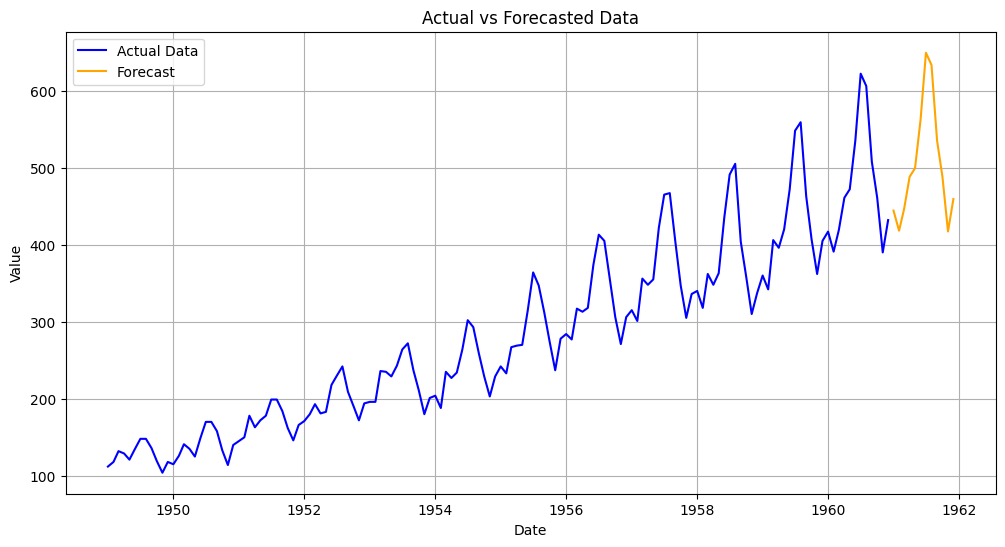

In [4]:
import matplotlib.pyplot as plt

# Assuming df and forecast_df have a 'date' column and a 'value' column
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Actual Data', color='blue')
plt.plot(forecast_df['ds'], forecast_df['AutoARIMA'], label='Forecast', color='orange')

# Add confidence intervals if available
if 'lower' in forecast_df.columns and 'upper' in forecast_df.columns:
    plt.fill_between(
        forecast_df['ds'],
        forecast_df['AutoARIMA-lo-90'],
        forecast_df['AutoARIMA-hi-90'],
        color='orange',
        alpha=0.2,
        label='90% Confidence Interval'
    )

plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecasted Data')
plt.grid()
plt.show()


In [48]:
Y_df = pd.read_parquet('https://datasets-nixtla.s3.amazonaws.com/m4-hourly.parquet')
Y_df.head()

,unique_id,ds,y
0,H1,1,605.0
1,H1,2,586.0
2,H1,3,586.0
3,H1,4,559.0
4,H1,5,511.0


In [49]:
uids = Y_df['unique_id'].unique()[:10] # Select 10 ids to make the example faster
Y_df = Y_df.query('unique_id in @uids')
Y_df = Y_df.groupby('unique_id').tail(7 * 24) #Select last 7 days of data to make example faster

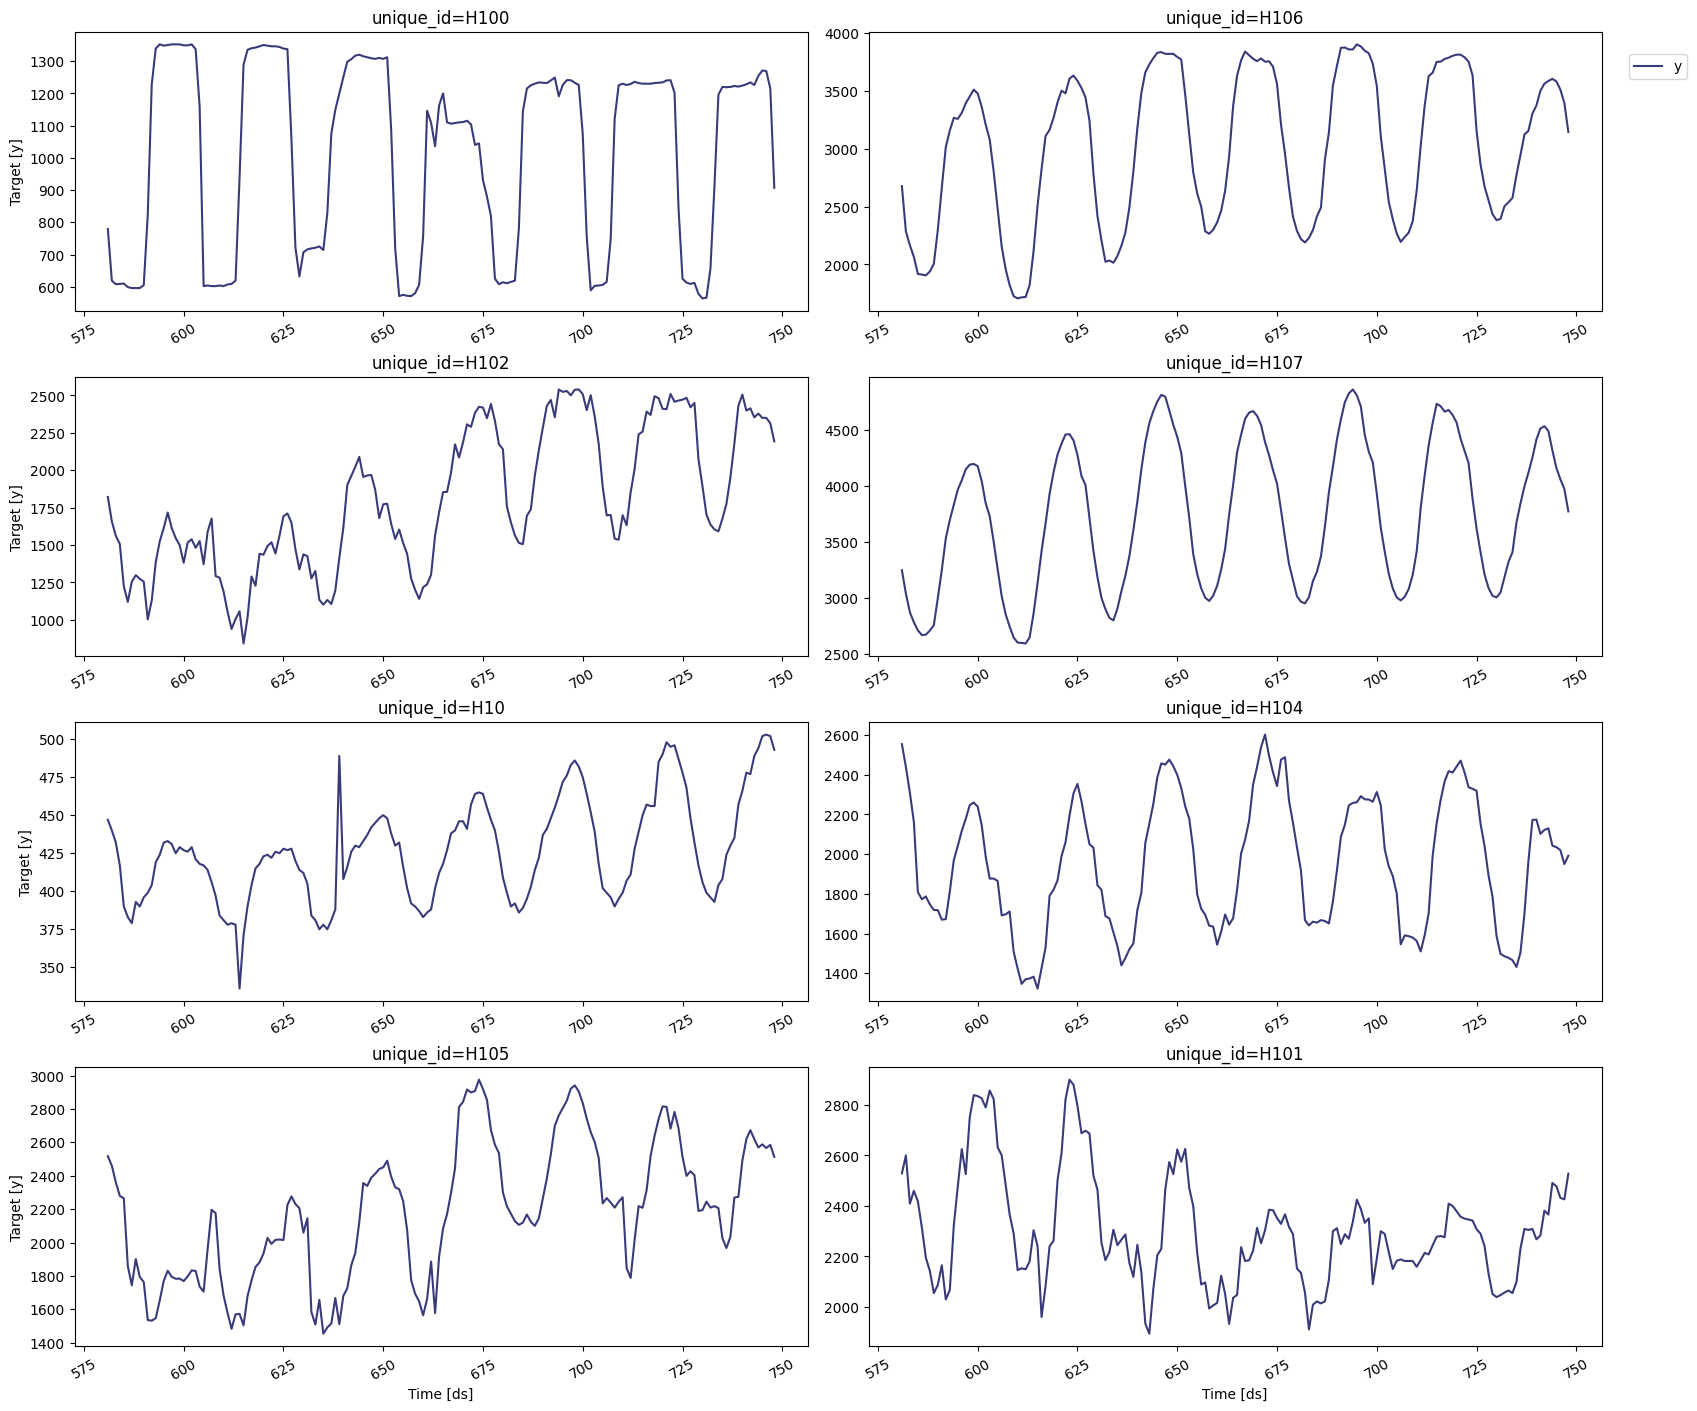

In [50]:
from statsforecast import StatsForecast
StatsForecast.plot(Y_df)

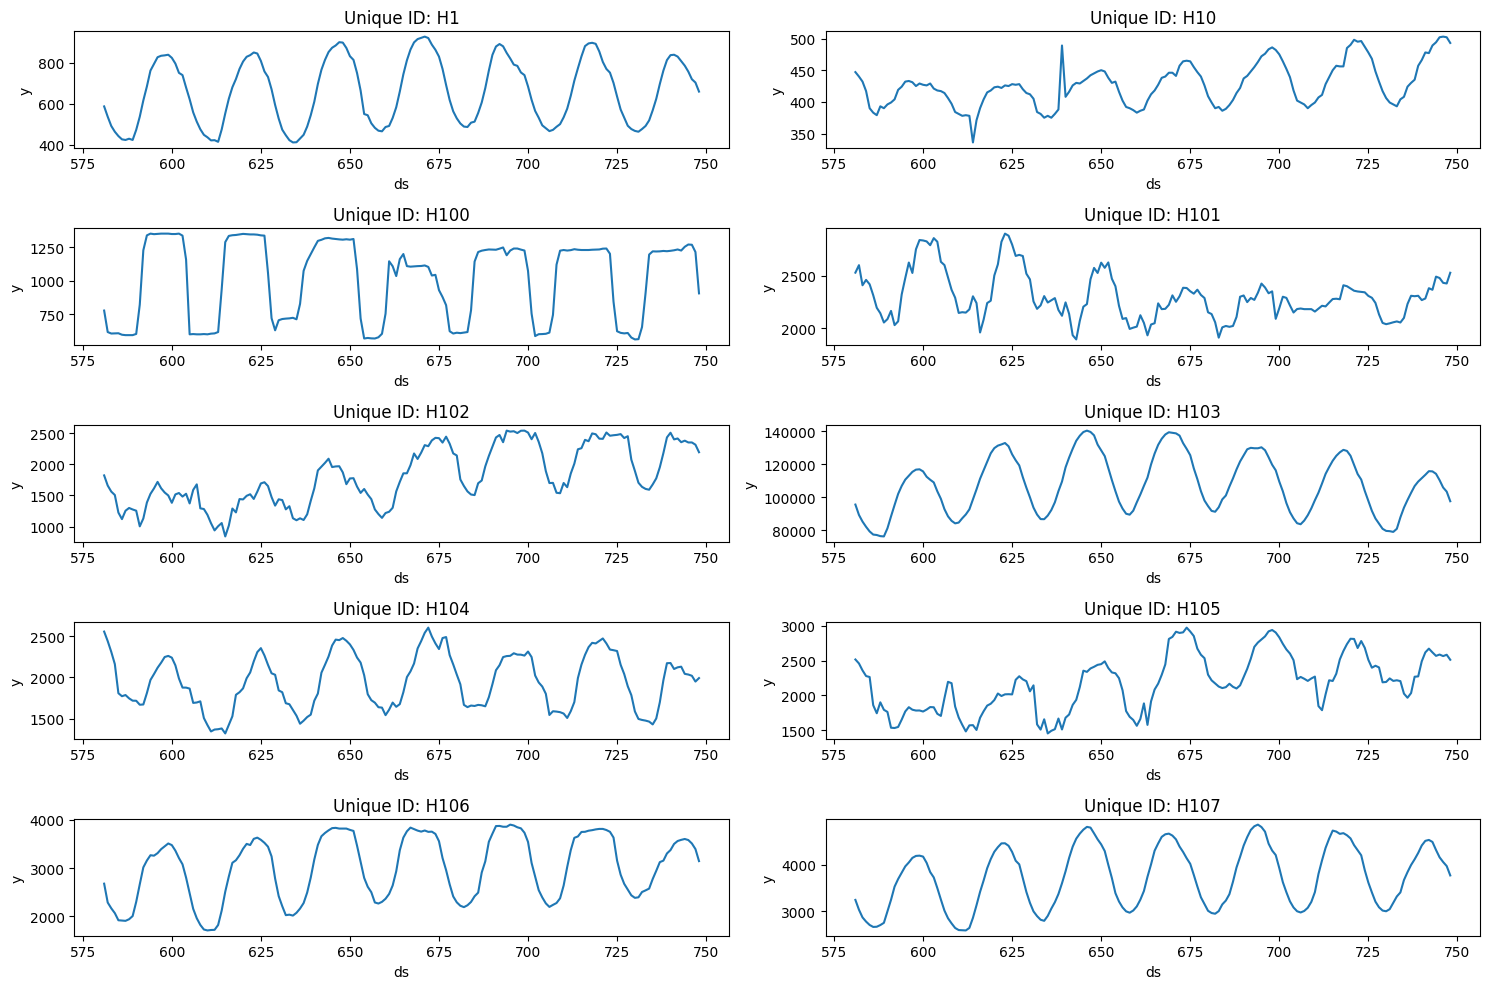

In [7]:
import matplotlib.pyplot as plt

# Ejemplo de datos (reemplaza esto con tu DataFrame real)
# Y_df = pd.read_parquet('your_parquet_file.parquet')

# Crear un subconjunto si tienes demasiados unique_ids (opcional)
unique_ids = Y_df['unique_id'].unique()

# Configuración de subgráficos
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Convertimos en una lista plana para iterar fácilmente

for idx, unique_id in enumerate(unique_ids):  # Solo los primeros 6 ids
    ax = axes[idx]  # Seleccionamos el subplot correspondiente
    df_filtered = Y_df[Y_df['unique_id'] == unique_id]
    ax.plot(df_filtered['ds'], df_filtered['y'], label=f"ID: {unique_id}")
    ax.set_title(f"Unique ID: {unique_id}")
    ax.set_xlabel("ds")
    ax.set_ylabel("y")

# Ajustar diseño
plt.tight_layout()
plt.show()

In [8]:
from statsforecast import StatsForecast
from statsforecast.models import (
    HoltWinters,
    CrostonClassic as Croston, 
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)

# Create a list of models and instantiation parameters
models = [
    HoltWinters(),
    Croston(),
    SeasonalNaive(season_length=24),
    HistoricAverage(),
    DOT(season_length=24)
]

# Instantiate StatsForecast class as sf
sf = StatsForecast( 
    models=models,
    freq=1, 
    fallback_model = SeasonalNaive(season_length=7),
    n_jobs=-1,
)

In [9]:
forecasts_df = sf.forecast(df=Y_df, h=48, level=[90])
forecasts_df.head()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,HoltWinters,HoltWinters-lo-90,HoltWinters-hi-90,CrostonClassic,CrostonClassic-lo-90,CrostonClassic-hi-90,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,HistoricAverage,HistoricAverage-lo-90,HistoricAverage-hi-90,DynamicOptimizedTheta,DynamicOptimizedTheta-lo-90,DynamicOptimizedTheta-hi-90
unique_id,,,,,,,,,,,,,,,,
H1,749,829.0,-246.367557,1904.367557,829.0,-246.367557,1904.367557,635.0,537.471214,732.528786,660.982143,398.037761,923.926524,592.701851,577.677280,611.652639
H1,750,807.0,-268.367557,1882.367557,807.0,-268.367557,1882.367557,572.0,474.471214,669.528786,660.982143,398.037761,923.926524,525.589116,505.449755,546.621805
H1,751,785.0,-290.367557,1860.367557,785.0,-290.367557,1860.367557,532.0,434.471214,629.528786,660.982143,398.037761,923.926524,489.251814,462.072871,512.424116
H1,752,756.0,-319.367557,1831.367557,756.0,-319.367557,1831.367557,493.0,395.471214,590.528786,660.982143,398.037761,923.926524,456.195032,430.554302,478.260963
H1,753,719.0,-356.367557,1794.367557,719.0,-356.367557,1794.367557,477.0,379.471214,574.528786,660.982143,398.037761,923.926524,436.290514,411.051232,461.815932


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


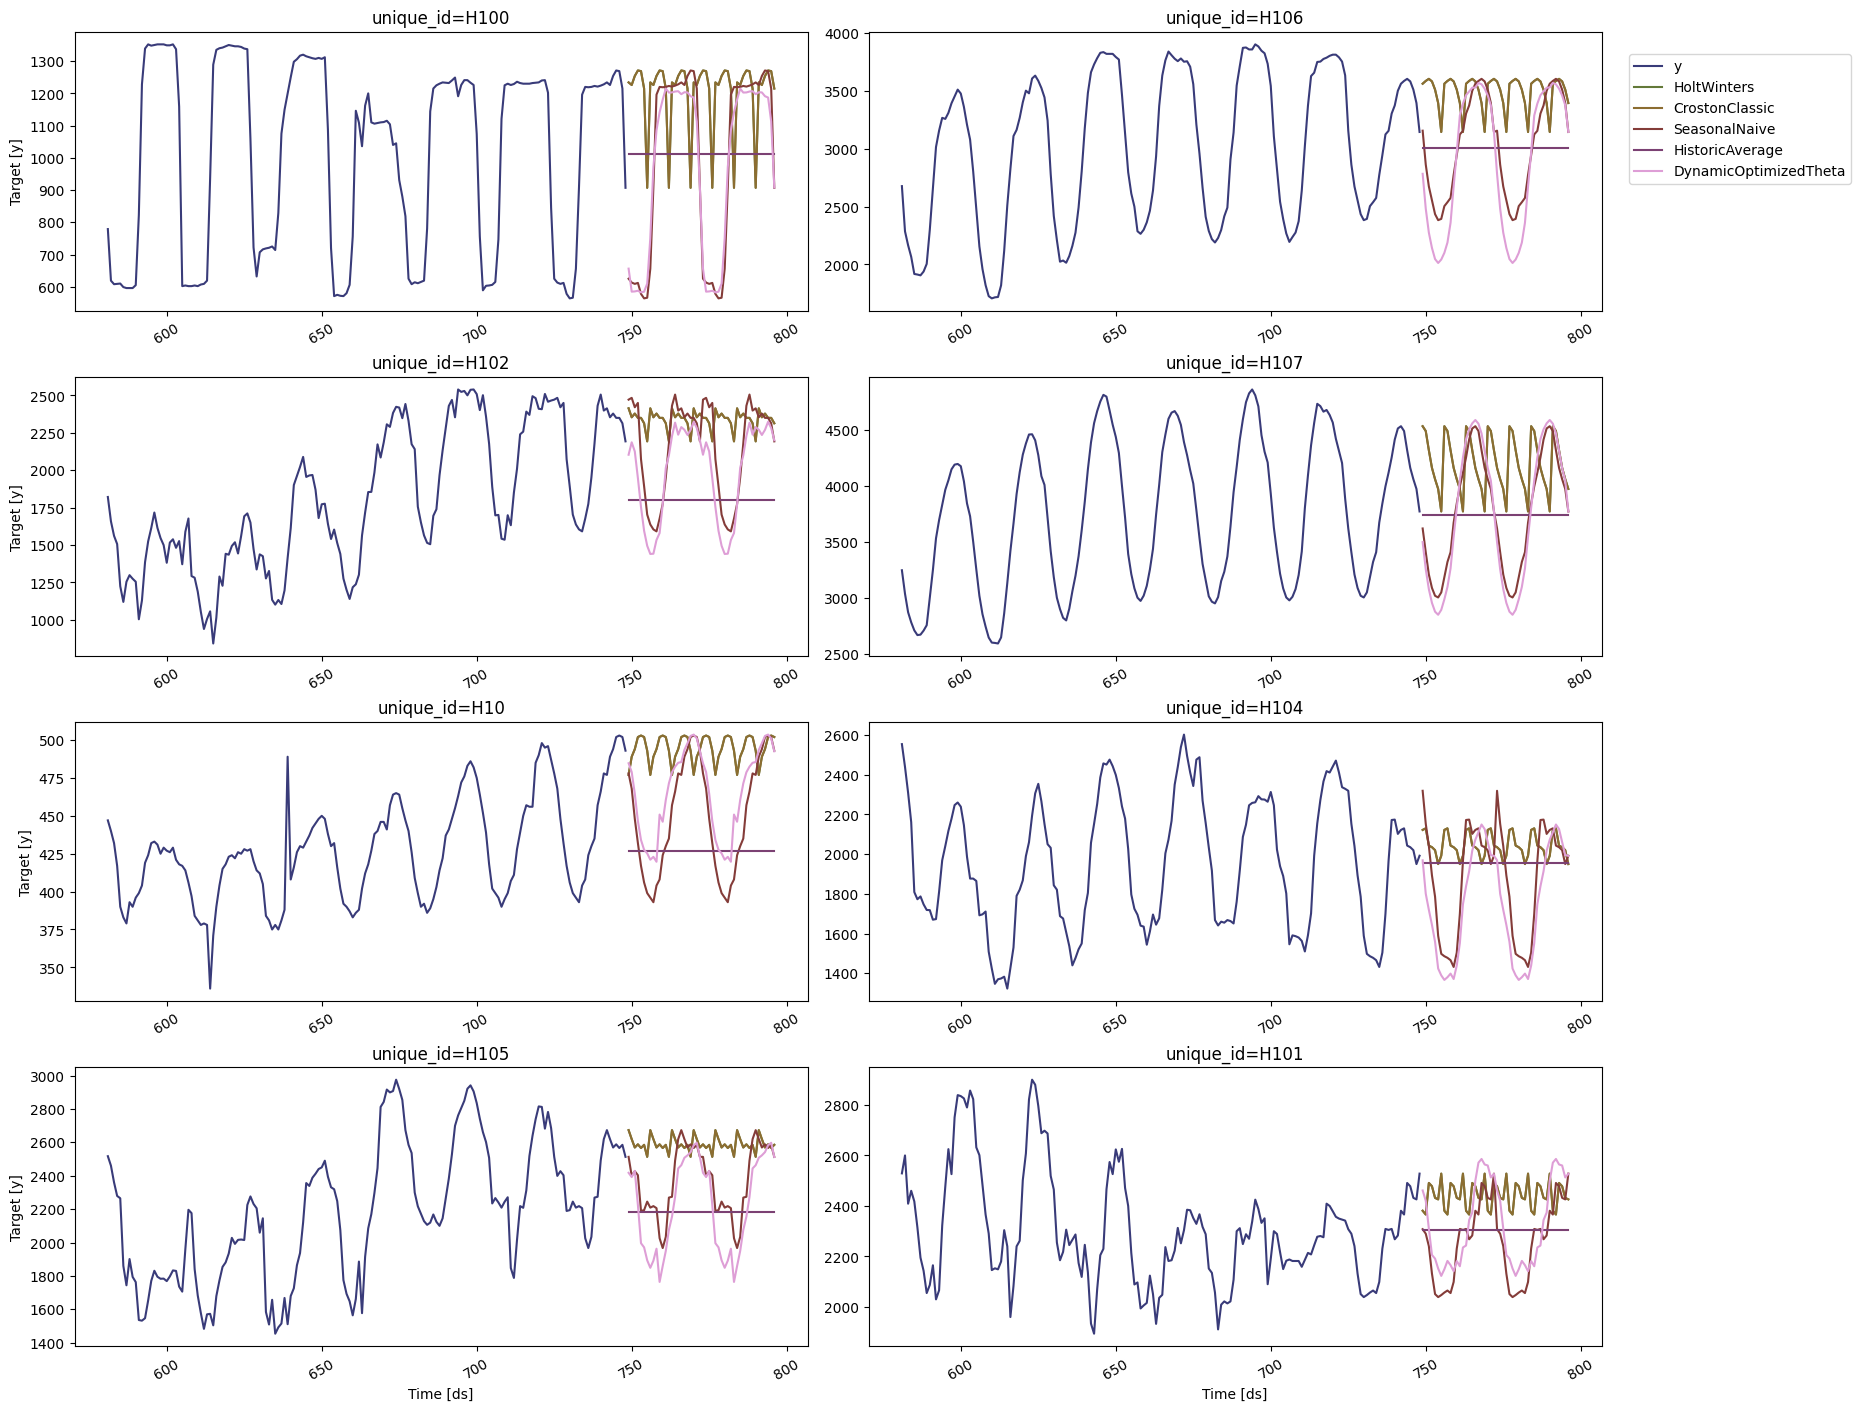

In [10]:
sf.plot(Y_df,forecasts_df)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


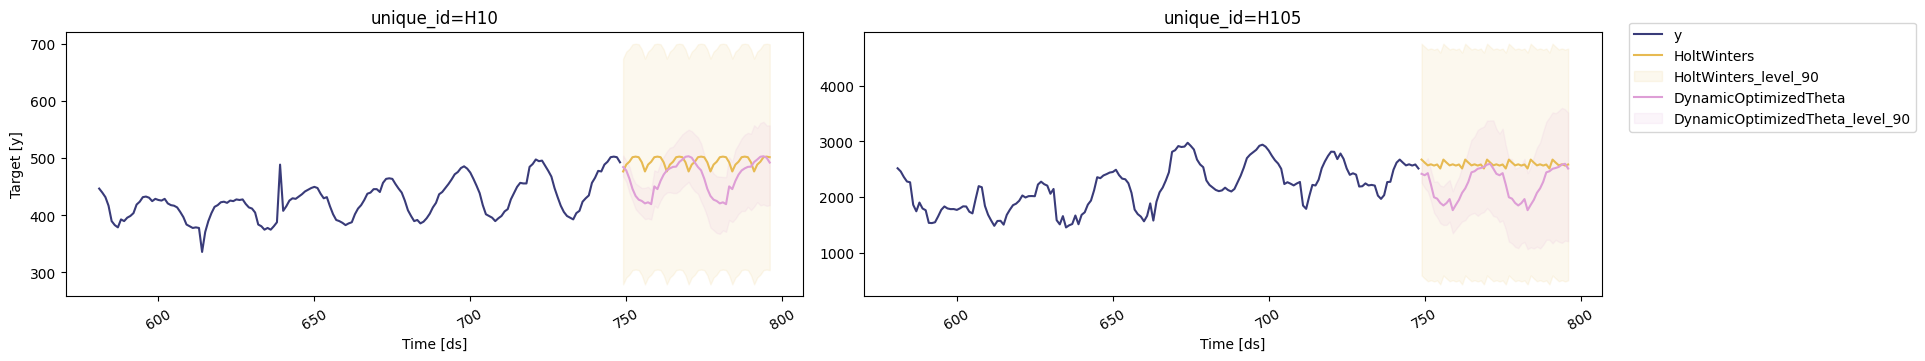

In [11]:
# Plot to unique_ids and some selected models
sf.plot(Y_df, forecasts_df, models=["HoltWinters","DynamicOptimizedTheta"], unique_ids=["H10", "H105"], level=[90])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


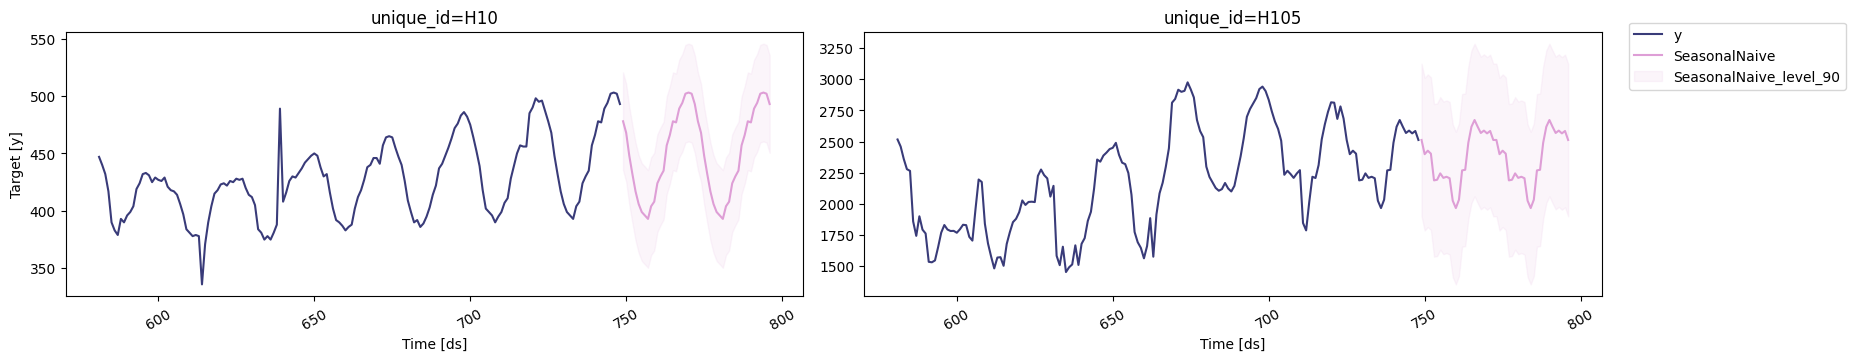

In [12]:
# Explore other models 
sf.plot(Y_df, forecasts_df, models=["SeasonalNaive"], unique_ids=["H10", "H105"], level=[90])

In [51]:
crossvaldation_df = sf.cross_validation(
    df=Y_df,
    h=24,
    step_size=24,
    n_windows=2
)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [52]:
crossvaldation_df.head()

,ds,cutoff,y,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta
unique_id,,,,,,,,
H1,701,700,619.0,847.0,742.668748,691.0,661.675,612.767504
H1,702,700,565.0,820.0,742.668748,618.0,661.675,536.846278
H1,703,700,532.0,790.0,742.668748,563.0,661.675,497.824286
H1,704,700,495.0,784.0,742.668748,529.0,661.675,464.723219
H1,705,700,481.0,752.0,742.668748,504.0,661.675,440.972336


In [54]:
from utilsforecast.losses import mse
from utilsforecast.evaluation import evaluate

def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['unique_id', 'ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    # Calculate loss for every unique_id and cutoff.    
    for cutoff in df['cutoff'].unique():
        eval_ = evaluate(df[df['cutoff'] == cutoff], metrics=[metric], models=models)
        evals.append(eval_)
    evals = pd.concat(evals)
    evals = evals.groupby('unique_id').mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

evaluation_df = evaluate_cross_validation(crossvaldation_df.reset_index(), mse)
evaluation_df.head()

,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta,best_model
unique_id,,,,,,
H1,44888.020833,28038.733985,1422.666667,20927.664488,1296.333977,DynamicOptimizedTheta
H10,2812.916667,1483.483839,96.895833,1980.367543,379.621134,SeasonalNaive
H100,121625.375000,91945.139237,12019.000000,78491.191439,21699.649325,SeasonalNaive
H101,28453.395833,16183.634340,10944.458333,18208.409800,63698.077266,SeasonalNaive
H102,232924.854167,132655.309136,12699.895833,309110.475212,31393.535274,SeasonalNaive


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


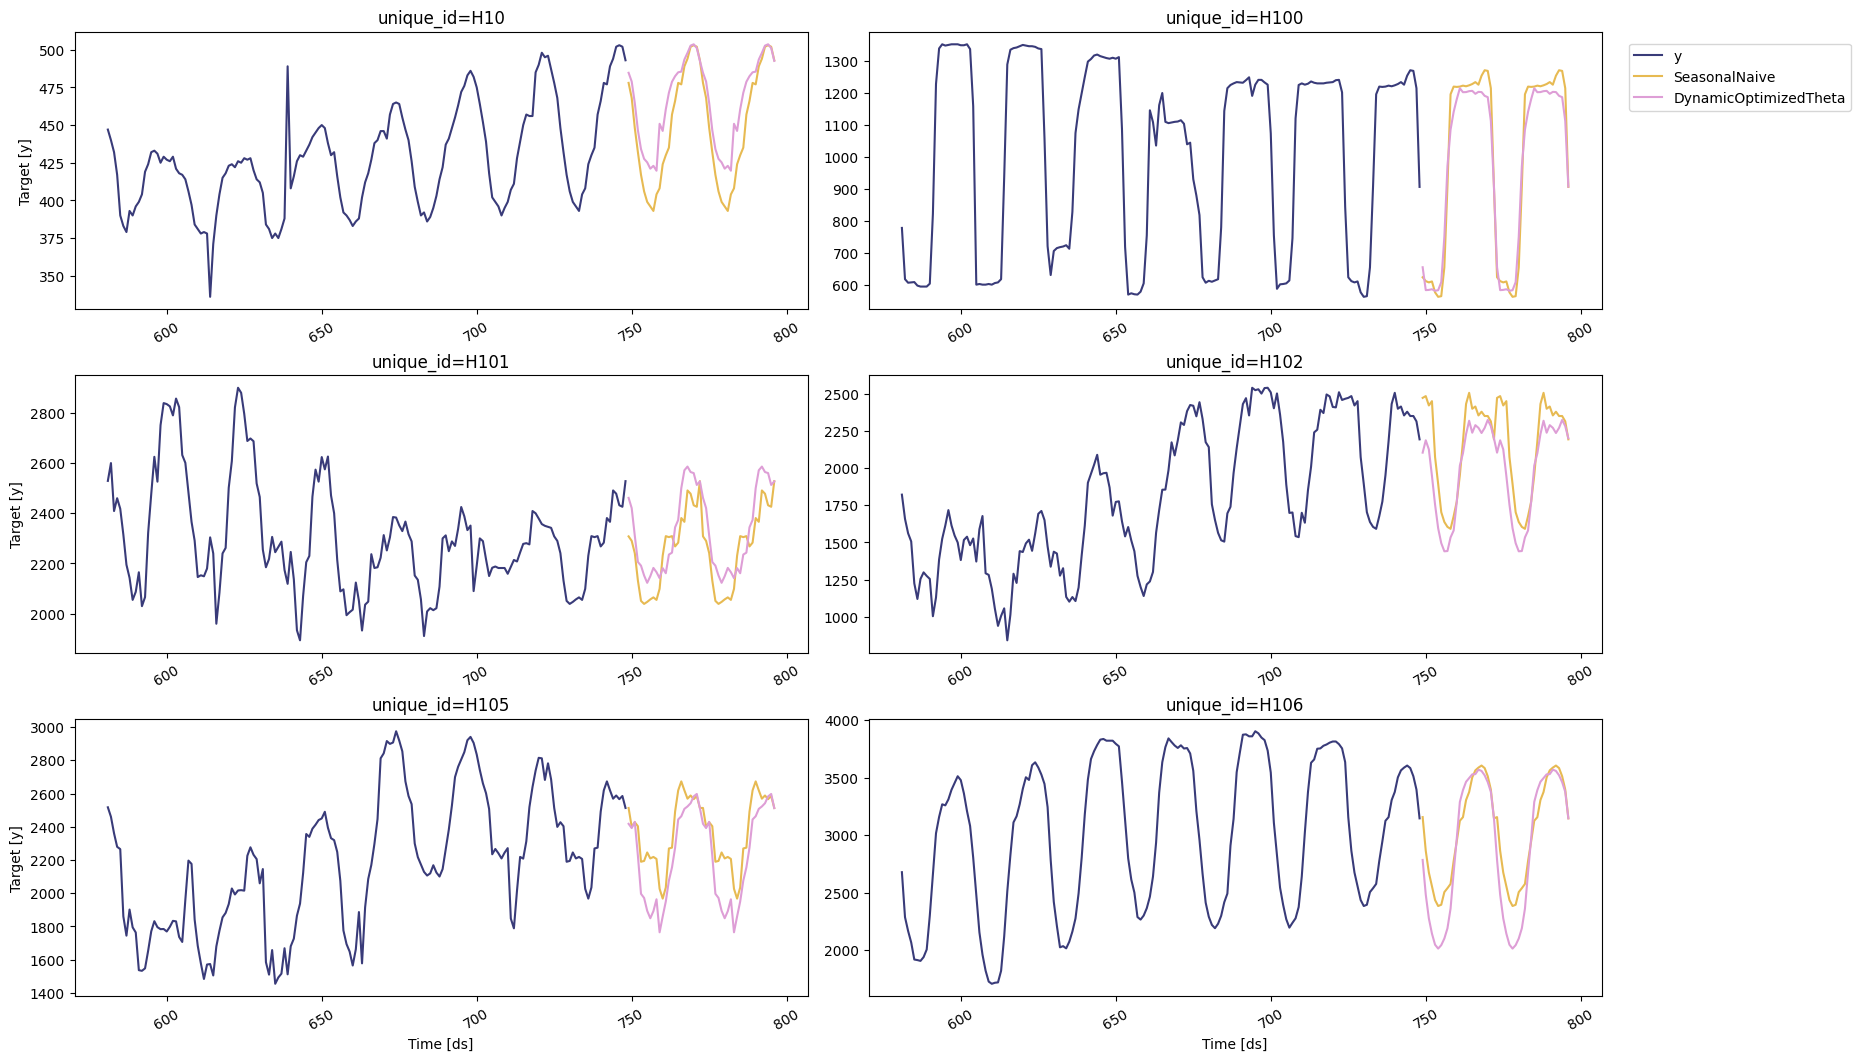

In [55]:
summary_df = evaluation_df.groupby('best_model').size().sort_values().to_frame()
summary_df.reset_index().columns = ["Model", "Nr. of unique_ids"]

seasonal_ids = evaluation_df.query('best_model == "SeasonalNaive"').index
sf.plot(Y_df,forecasts_df, unique_ids=seasonal_ids, models=["SeasonalNaive","DynamicOptimizedTheta"])

In [57]:
def get_best_model_forecast(forecasts_df, evaluation_df):
    df = forecasts_df.set_index(['unique_id', 'ds']).stack().to_frame().reset_index(level=2) # Wide to long 
    df.columns = ['model', 'best_model_forecast'] 
    df = df.join(evaluation_df[['best_model']])
    df = df.query('model.str.replace("-lo-90|-hi-90", "", regex=True) == best_model').copy()
    df.loc[:, 'model'] = [model.replace(bm, 'best_model') for model, bm in zip(df['model'], df['best_model'])]
    df = df.drop(columns='best_model').set_index('model', append=True).unstack()
    df.columns = df.columns.droplevel()
    df.columns.name = None
    df = df.reset_index()
    return df


prod_forecasts_df = get_best_model_forecast(forecasts_df.reset_index(), evaluation_df)
prod_forecasts_df.head()

,unique_id,ds,best_model,best_model-hi-90,best_model-lo-90
0,H1,749,592.701851,611.652639,577.677280
1,H1,750,525.589116,546.621805,505.449755
2,H1,751,489.251814,512.424116,462.072871
3,H1,752,456.195032,478.260963,430.554302
4,H1,753,436.290514,461.815932,411.051232


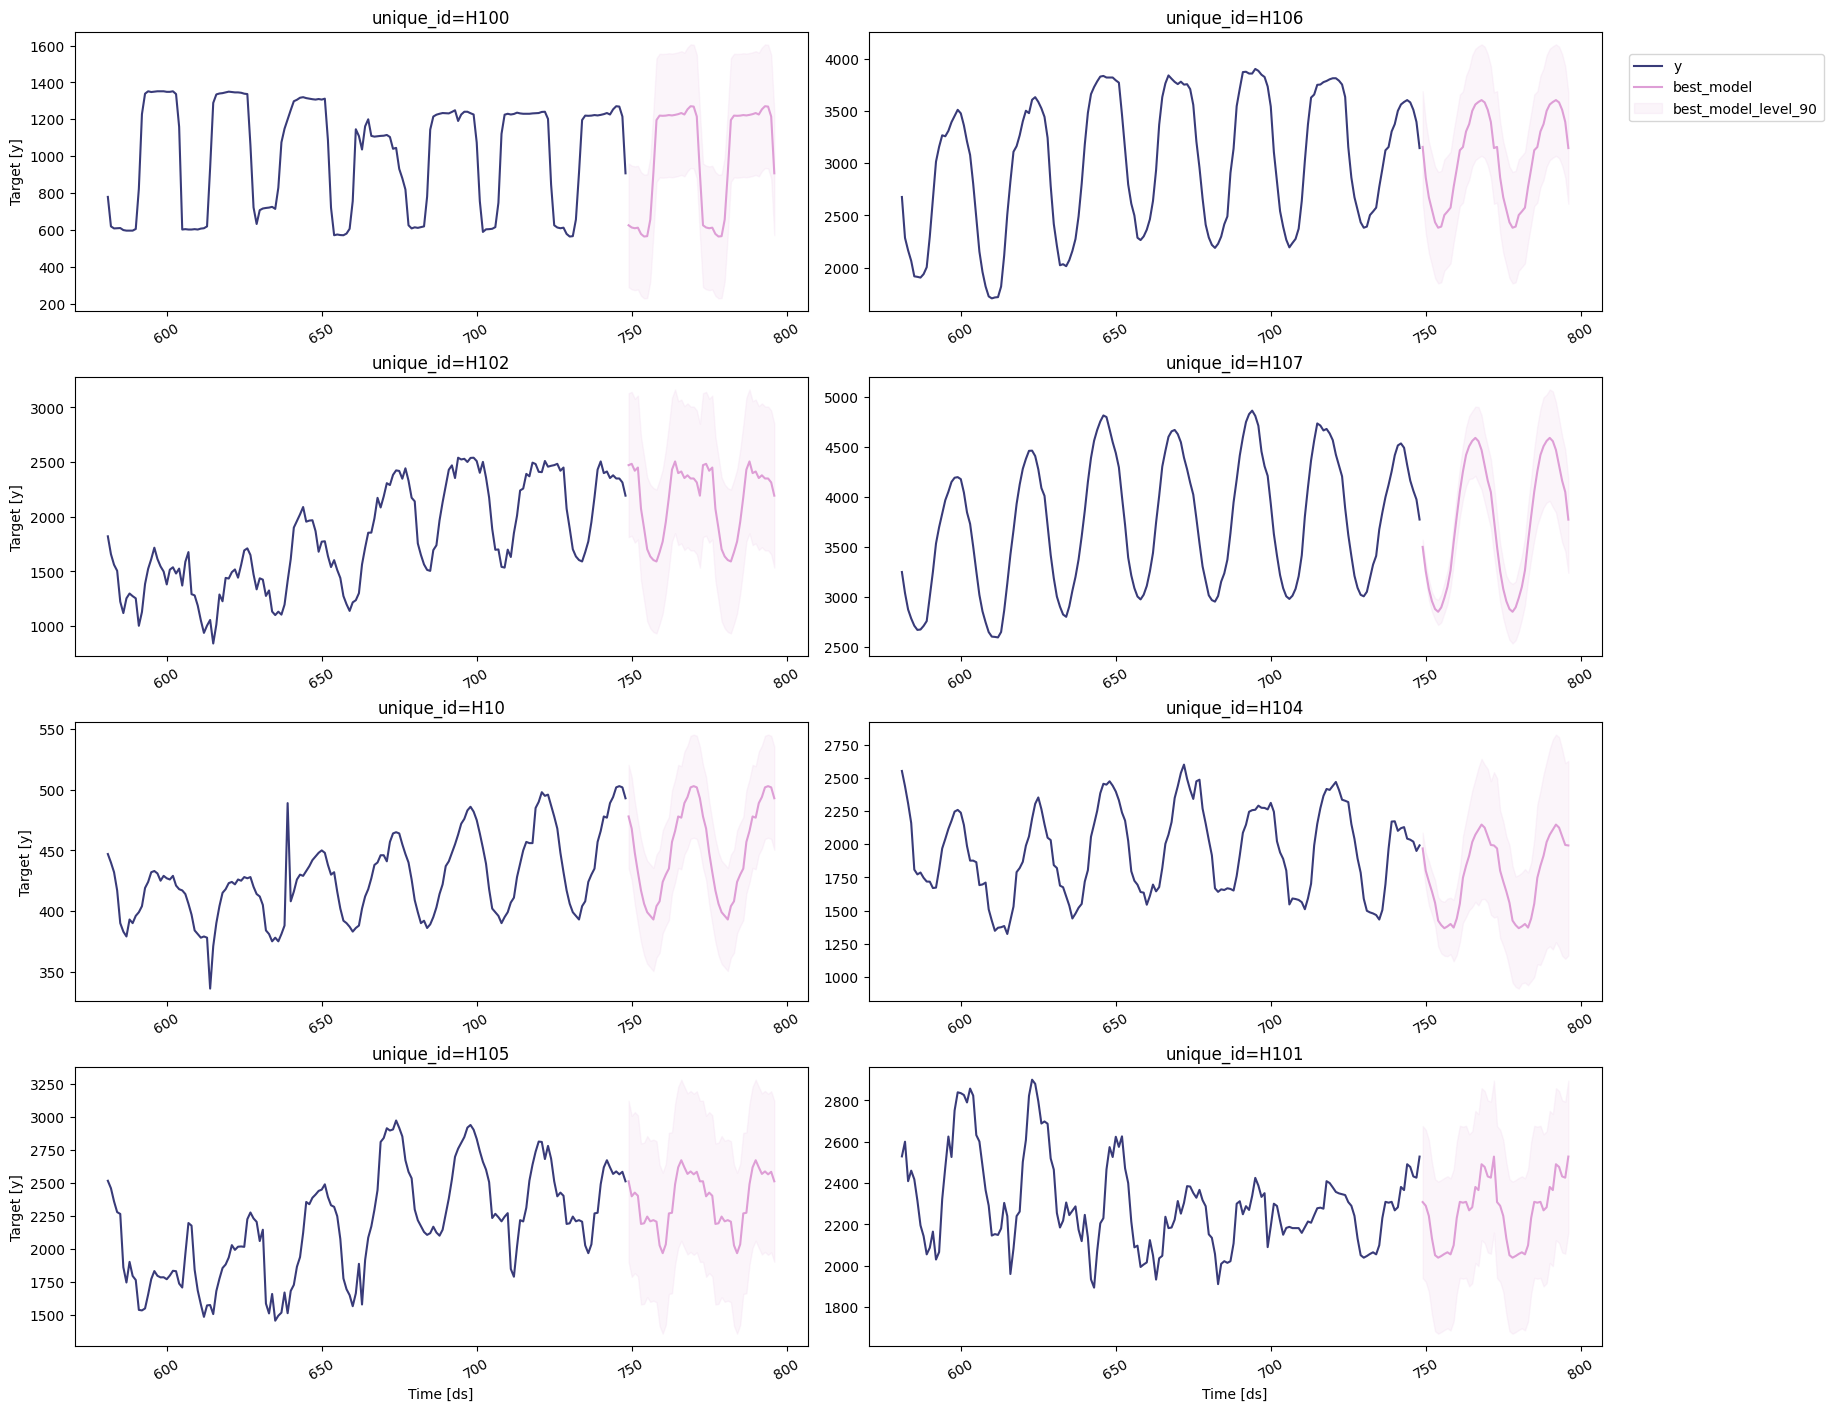

In [58]:
sf.plot(Y_df, prod_forecasts_df, level=[90])

In [ ]:
# https://utdt.zoom.us/rec/play/NP9vpddxjpkENOgHN3IEMxjet0Tzz3Vvg8S_jrzOxsr4gYlars6TXbEYS0H66sidIGecO-9SVT4pGs1o.54QnFD748RhP3Xdu?canPlayFromShare=true&from=share_recording_detail&continueMode=true&componentName=rec-play&originRequestUrl=https%3A%2F%2Futdt.zoom.us%2Frec%2Fshare%2F6bDwTbEXmALx5CM90GMlKCJsmYXb3xauX-fNVs05CWyCrevq0QdvDnuosVKRx4O3.N4zNbnI-kv-GTsc3

In [ ]:
# https://utdt.zoom.us/rec/play/hD98eEiFSfxzg-jDDdZsfOP2UUKK1mivMdrVO3GrITlljnX4as__REnDtOQn0efAAZg54eXJWwGu7X_K.Xpc-bHb_ifHac5nx?canPlayFromShare=true&from=share_recording_detail&continueMode=true&componentName=rec-play&originRequestUrl=https%3A%2F%2Futdt.zoom.us%2Frec%2Fshare%2FdyAIawOPNdYIwpEeqKfmxkWg4QtbrkX2NzE36Y4dmz9wk31RYHeXjPMI0740K0HW.xJJ7RlJvTZI3cS95

In [3]:
from statsforecast.utils import AirPassengersDF
Y_df = AirPassengersDF
Y_df.head(1)

,unique_id,ds,y
0,1.0,1949-01-31,112.0


In [7]:
Y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  144 non-null    float64       
 1   ds         144 non-null    datetime64[ns]
 2   y          144 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.5 KB


In [ ]:
Y_df['ds'].max(), Y_df['ds'].min()

(Timestamp('1960-12-31 00:00:00'), Timestamp('1949-01-31 00:00:00'))

In [4]:
import pandas as pd

from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS, AutoTheta, AutoCES

In [5]:
season_length = 12 # Define season length as 12 months for monthly data
horizon = 1 # Forecast horizon is set to 1 month

# Define a list of models for forecasting
models = [
    AutoARIMA(season_length=season_length), # ARIMA model with automatic order selection and seasonal component
    AutoETS(season_length=season_length), # ETS model with automatic error, trend, and seasonal component
    AutoTheta(season_length=season_length), # Theta model with automatic seasonality detection
    AutoCES(season_length=season_length), # CES model with automatic seasonality detection
]

# Instantiate StatsForecast class with models, data frequency ('M' for monthly),
# and parallel computation on all CPU cores (n_jobs=-1)
sf = StatsForecast(
    models=models, # models for forecasting
    freq=pd.offsets.MonthEnd(),  # frequency of the timestamps
    n_jobs=1  # number of jobs to run in parallel, -1 means using all processors
)

In [6]:
# Generate forecasts for the specified horizon using the sf object
Y_hat_df = sf.forecast(df=Y_df, h=horizon) # forecast data
# Display the first few rows of the forecast DataFrame
Y_hat_df.head() # preview of forecasted data

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoETS,AutoTheta,CES
unique_id,,,,,
1.0,1961-01-31,444.309575,442.357169,442.940797,453.03418


In [11]:
Y_df.sort_values(by='ds', ascending=False).head(1)

,unique_id,ds,y
143,1.0,1960-12-31,432.0


In [10]:
Y_hat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 1.0 to 1.0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         1 non-null      datetime64[ns]
 1   AutoARIMA  1 non-null      float64       
 2   AutoETS    1 non-null      float64       
 3   AutoTheta  1 non-null      float64       
 4   CES        1 non-null      float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 48.0 bytes


In [9]:
Y_hat_df['ds'].max(), Y_hat_df['ds'].min()

(Timestamp('1961-01-31 00:00:00'), Timestamp('1961-01-31 00:00:00'))

In [15]:
sf.fit(df=Y_df) # Fit the models to the data using the fit method of the StatsForecast object

sf.fitted_ # Access fitted models from the StatsForecast object

Y_hat_df = sf.predict(h=horizon) # Predict or forecast 'horizon' steps ahead using the predict method

Y_hat_df.head() # Preview the first few rows of the forecasted data

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoETS,AutoTheta,CES
unique_id,,,,,
1.0,1961-01-31,444.309575,442.357169,442.940797,453.03418


In [16]:
import numpy as np
import pandas as pd

import scipy.stats as stats

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/candy_production.csv")
df.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [19]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,1972-01-01,85.6945,1
1,1972-02-01,71.8200,1
2,1972-03-01,66.0229,1
3,1972-04-01,64.5645,1
4,1972-05-01,65.0100,1


In [20]:
df["ds"] = pd.to_datetime(df["ds"])

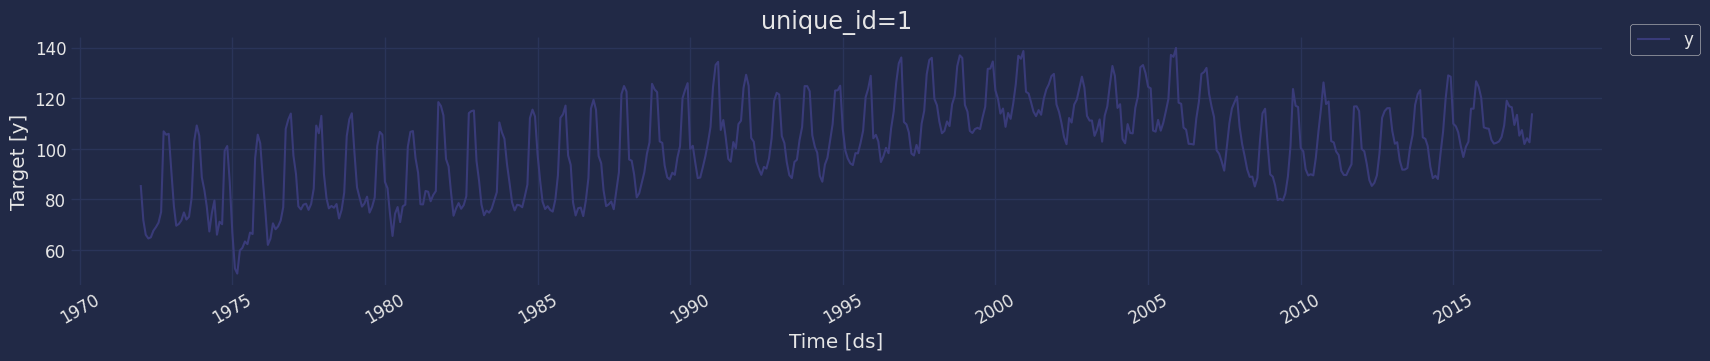

In [21]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

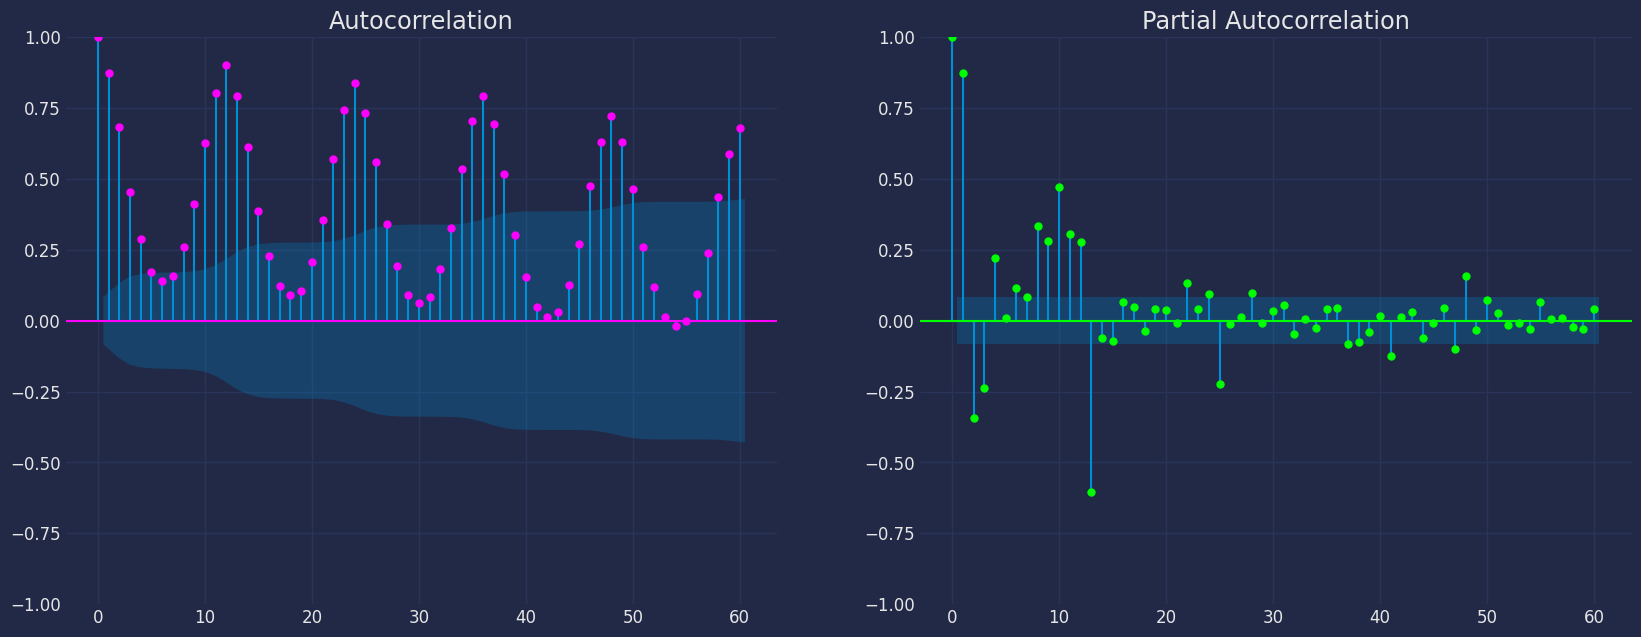

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=60, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

plot_pacf(df["y"],  lags=60, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();

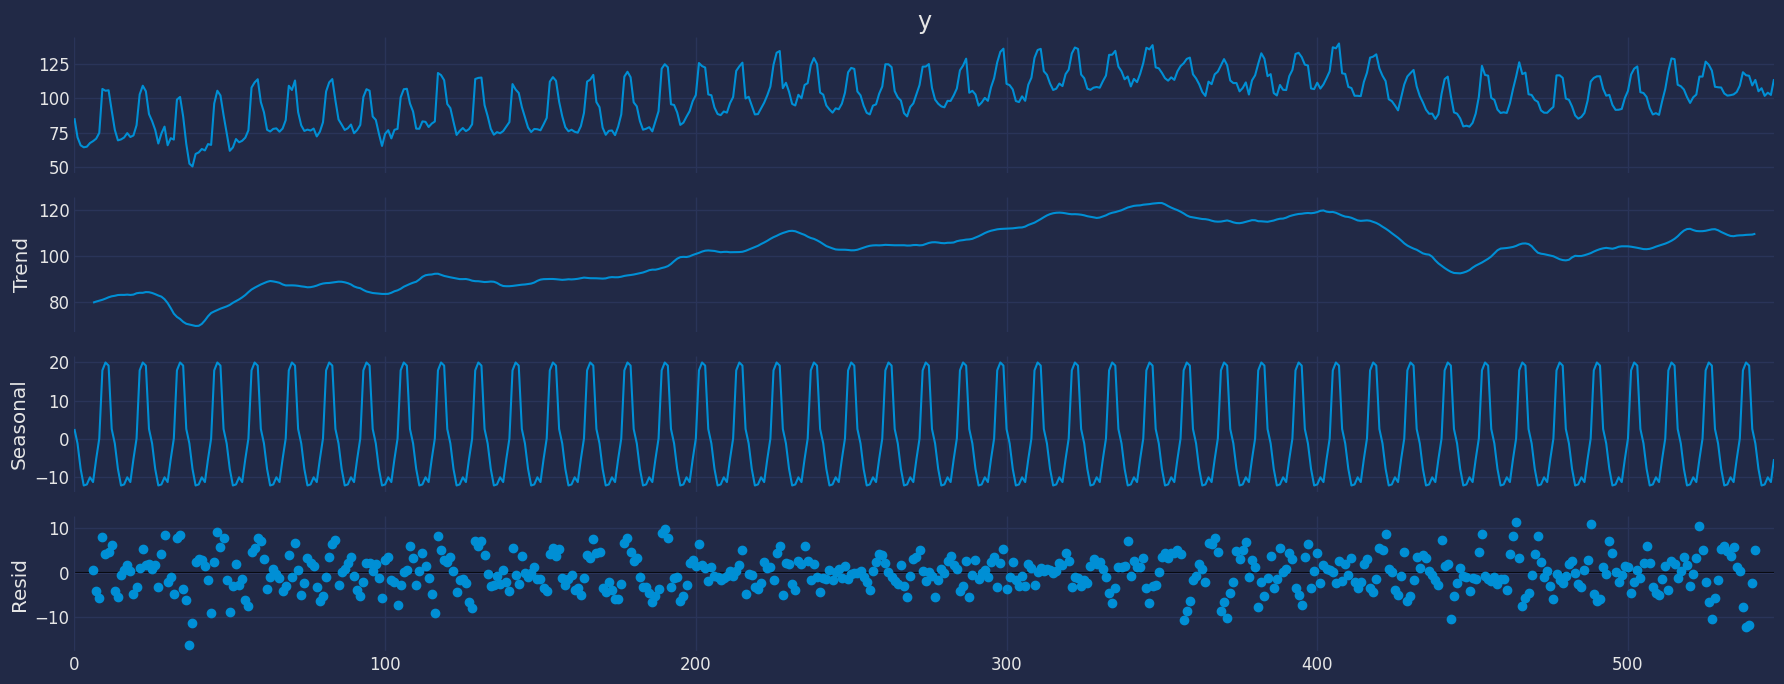

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(df["y"], model = "add", period=12)
a.plot();

In [25]:
Y_train_df = df[df.ds<='2016-08-01'] 
Y_test_df = df[df.ds>'2016-08-01']
Y_train_df.shape, Y_test_df.shape

((536, 3), (12, 3))

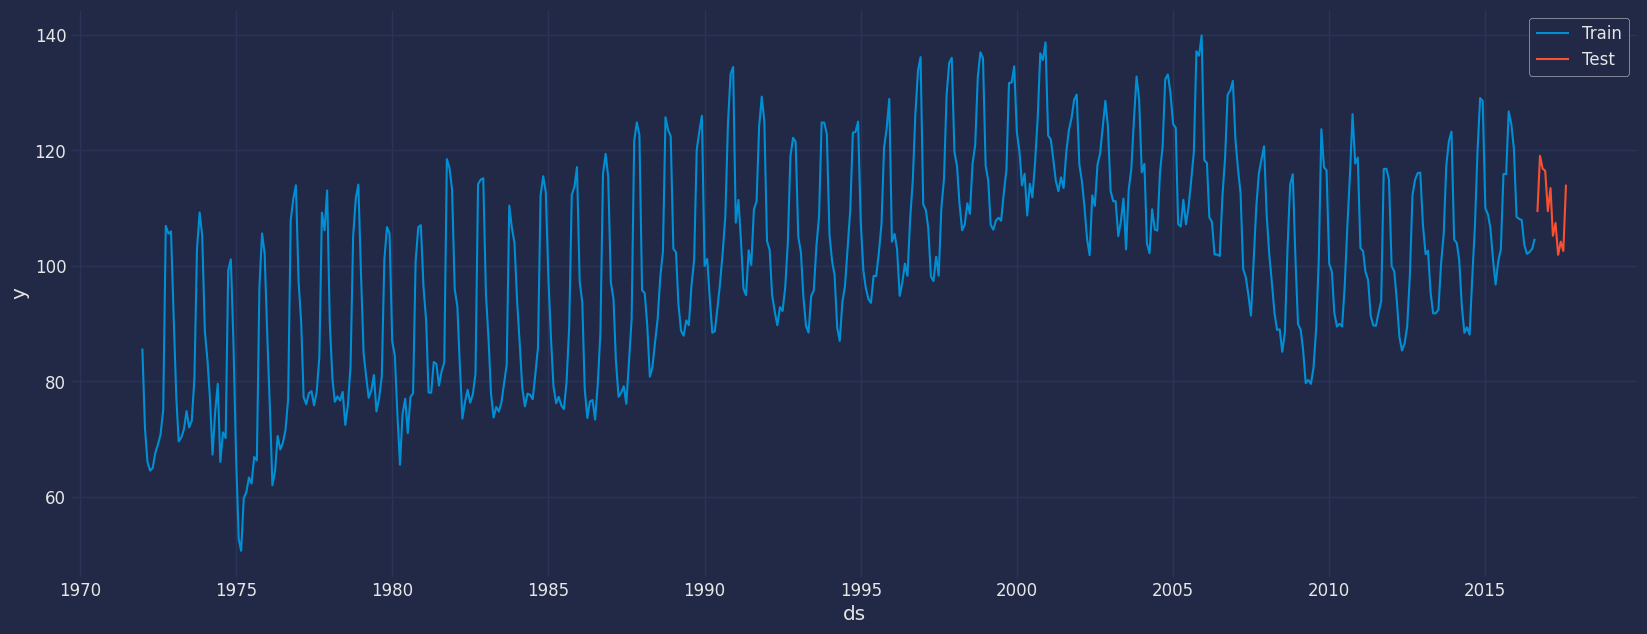

In [26]:
sns.lineplot(Y_train_df,x="ds", y="y", label="Train")
sns.lineplot(Y_test_df, x="ds", y="y", label="Test")
plt.show()

In [27]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

In [28]:
season_length = 12 # Monthly data 
horizon = len(Y_test_df) # number of predictions

models = [AutoARIMA(season_length=season_length)]

In [42]:
sf = StatsForecast(models=models, freq='MS')

In [43]:
sf.fit(df=Y_train_df)

StatsForecast(models=[AutoARIMA])

In [44]:
arima_string(sf.fitted_[0,0].model_)

'ARIMA(2,0,2)(0,1,2)[12]                   '

In [45]:
result=sf.fitted_[0,0].model_
print(result.keys())
print(result['arma'])

dict_keys(['coef', 'sigma2', 'var_coef', 'mask', 'loglik', 'aic', 'arma', 'residuals', 'code', 'n_cond', 'nobs', 'model', 'bic', 'aicc', 'ic', 'xreg', 'x', 'lambda'])
(2, 2, 0, 2, 12, 0, 1)


In [46]:
result

{'coef': {'ar1': 0.3488161572416075,
  'ar2': 0.5473297481866037,
  'ma1': 0.3444614899283312,
  'ma2': -0.2622454308054862,
  'sma1': -0.6331575417026171,
  'sma2': -0.10129537570110174},
 'sigma2': 13.867823195676648,
 'var_coef': array([[ 0.00061976, -0.00072067,  0.        ,  0.        ,  0.        ,
          0.        ],
        [-0.00072067,  0.00093524,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.0019084 ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.0019084 ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.0019084 ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.0019084 ]]),
 'mask': array([ True,  True,  True,  True,  True,  True]),
 'loglik': -1434.0870092127439,
 'aic': 2882.1740184254877,
 'arma': (2, 2, 0, 2, 12, 0, 1),
 'residuals': array([ 8.5694340

In [47]:
residual=pd.DataFrame(result.get("residuals"), columns=["residual Model"])
residual

,residual Model
0,0.085694
1,0.071820
2,0.066022
3,0.064564
4,0.065009
...,...
531,2.781249
532,3.288113
533,0.247510
534,0.350248


C:\Users\HP\AppData\Local\Temp\ipykernel_12636\3728362320.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, ax=axs[0,1]);


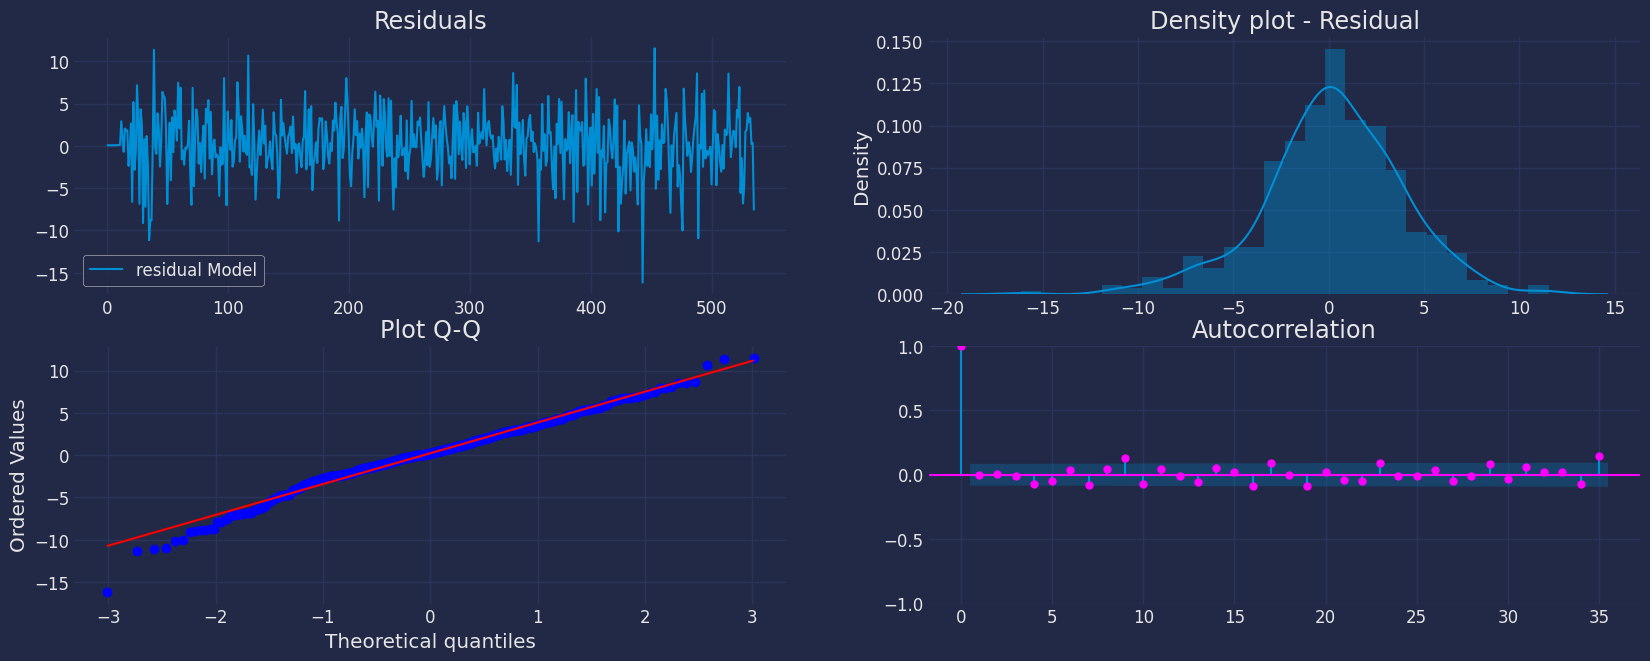

In [48]:
fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
residual.plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");

# plot
sns.distplot(residual, ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(residual["residual Model"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(residual,  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/candy_production.csv")
df["unique_id"]= range(1, len(df)+1)
df.columns=["ds", "y", "unique_id"]
df["ds"] = pd.to_datetime(df["ds"])
df.sort_values(by="ds", ascending=True, inplace=True)
df["unique_id"]= range(1, len(df)+1)
df.head(1)

,ds,y,unique_id
0,1972-01-01,85.6945,1


In [4]:
df.shape[0]

548

In [5]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

df["ds"] = pd.to_datetime(df["ds"])
y = df['y']
season_length = 12 # Monthly data 
horizon = len(y) # number of predictions

models = [AutoARIMA(season_length=season_length)]
sf = StatsForecast(models=models, freq='MS')
sf.fit(df=df)

StatsForecast(models=[AutoARIMA])

In [6]:
# Generar predicciones in-sample
df_pred = sf.predict(df.shape[0]).reset_index(drop=True)
df_pred["ds"] = pd.to_datetime(df["ds"])
df_pred.sort_values(by="ds", ascending=True, inplace=True)
df_pred['unique_id'] = range(1, len(df_pred)+1)
df_pred.head()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,unique_id
0,1972-01-01,85.6945,1
1,1972-02-01,85.6945,2
2,1972-03-01,85.6945,3
3,1972-04-01,85.6945,4
4,1972-05-01,85.6945,5


In [7]:
df_pred.shape[0]

300304

In [8]:
df_final = df.merge(df_pred, on='unique_id', suffixes=('_actual', '_forecast'))
df_final.head(1)

,ds_actual,y,unique_id,ds_forecast,AutoARIMA
0,1972-01-01,85.6945,1,1972-01-01,85.6945


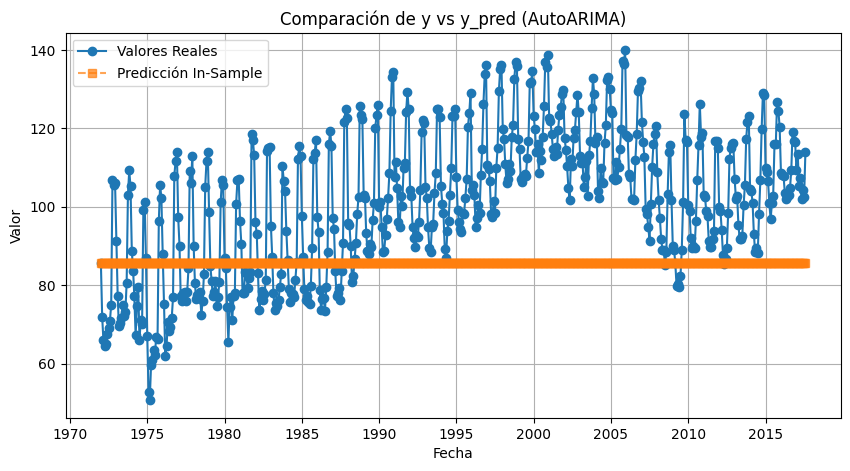

In [9]:
import matplotlib.pyplot as plt

# 🔹 Gráfico comparativo
plt.figure(figsize=(10, 5))
plt.plot(df_final["ds_actual"], df_final["y"], label="Valores Reales", marker="o", linestyle="-")
plt.plot(df_final["ds_actual"], df_final["AutoARIMA"], label="Predicción In-Sample", marker="s", linestyle="--", alpha=0.7)
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.title("Comparación de y vs y_pred (AutoARIMA)")
plt.grid(True)
plt.show()

In [10]:
df_final

,ds_actual,y,unique_id,ds_forecast,AutoARIMA
0,1972-01-01,85.6945,1,1972-01-01,85.6945
1,1972-02-01,71.8200,2,1972-02-01,85.6945
2,1972-03-01,66.0229,3,1972-03-01,85.6945
3,1972-04-01,64.5645,4,1972-04-01,85.6945
4,1972-05-01,65.0100,5,1972-05-01,85.6945
...,...,...,...,...,...
543,2017-04-01,107.4288,544,2017-04-01,85.6945
544,2017-05-01,101.9209,545,2017-05-01,85.6945
545,2017-06-01,104.2022,546,2017-06-01,85.6945
546,2017-07-01,102.5861,547,2017-07-01,85.6945
